## 02 - A82F/F87V - 23-24th April 2022

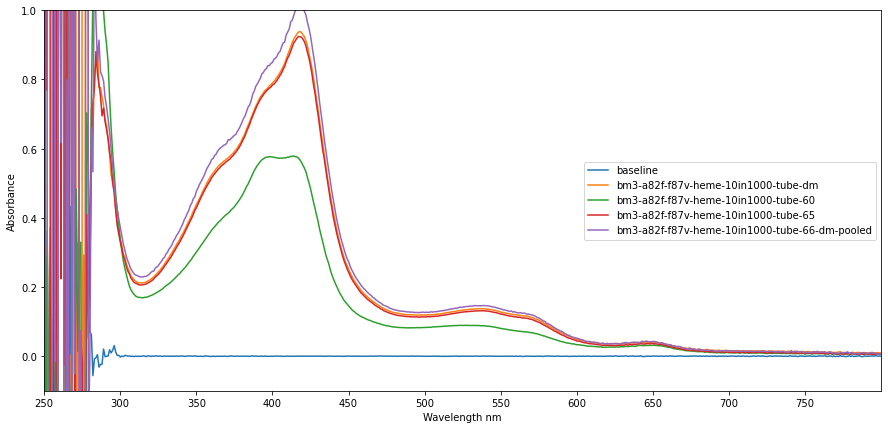

In [1]:
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import uv

data = uv.P450('../uv-vis/02-protconccheck-dm2.csv')
uv.plot_traces(data.df)

In [2]:
data.concs(95)

baseline                                          0.000000
bm3-a82f-f87v-heme-10in1000-tube-dm               9.682181
bm3-a82f-f87v-heme-10in1000-tube-60               5.743593
bm3-a82f-f87v-heme-10in1000-tube-65               9.585236
bm3-a82f-f87v-heme-10in1000-tube-66-dm-pooled    10.508840
Name: P450 conc/uM, dtype: float64

In [3]:
minvol = 384 * 15 * 40 / 1000
print(f'Min vol to fill plates: {minvol} ml')
print(f'with 20 ml saftey: {minvol + 20} ml')

Min vol to fill plates: 230.4 ml
with 20 ml saftey: 250.4 ml


In [4]:
def v1(c1,v2,c2):
    return (v2 * c2) / c1

c1 = 10.579766
v2 =  minvol + 20
print(f'{v1(c1, v2, 20)} µl protein in {v2} ml buffer')

473.35640504714377 µl protein in 250.4 ml buffer


## Re-Run

I ran the mixed-spin stuff anyway. 
Had enough Mixed spin left for another go if I lipidex it.

Will have to re-make a set of source plates:

In [5]:
import pandas as pd
pk = pd.read_csv('../echo/picklist/01-picklist.csv', index_col=0)
volCpdPerPlate = pk.loc[pk['Cpd'] == 'S1005','Transfer Volume /nl'].sum()
print(f'Vol cpd used per destination plate: {volCpdPerPlate} µl')
print(f'Vol cpd used total: {volCpdPerPlate * 2} µl')
print(f'Vol left in source plate: {(11.5*1000) - (volCpdPerPlate * 2)} µl')

Vol cpd used per destination plate: 4040.0 µl
Vol cpd used total: 8080.0 µl
Vol left in source plate: 3420.0 µl


## ToDo List

- Lipidex
    - wash column - 1h
    - run - 1-2h
        - elute & measure conc
    - wash column - 1h
- echo
    - new source plates
        - pipete tips - rerack - 1h - replace on Monday
        - dispense - 1h
- platereader
    - pull data & make config
    - re-run DM, 3-6h


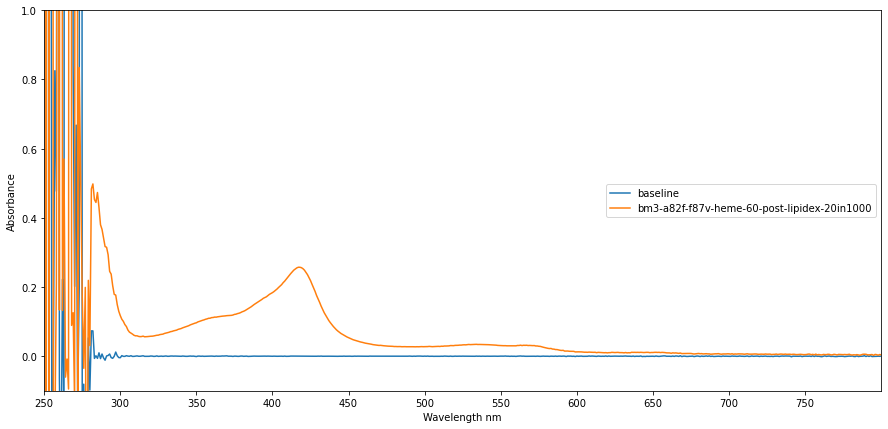

In [6]:
data = uv.P450('../uv-vis/02-protconccheck-dm4-2022-04-24.csv')
uv.plot_traces(data.df)

In [7]:
data.concs(95)

baseline                                       0.000000
bm3-a82f-f87v-heme-60-post-lipidex-20in1000    2.626547
Name: P450 conc/uM, dtype: float64

In [8]:
c1 = 2.663785 / (20/1000)
print(f'{c1} µM')

133.18925 µM


In [9]:
print(f'{v1(c1, v2, 20)} ml protein in {v2} ml buffer')

37.600632183152925 ml protein in 250.4 ml buffer


In [10]:
v2

250.4

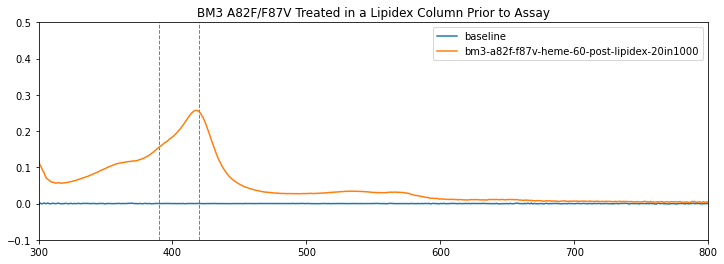

In [21]:
plt.figure(figsize=(12,4))
for i in data.df.columns:
    plt.plot(data.df.index, 
             data.df[i],
             label=i,
            )
plt.vlines(420, -0.1, 0.5, linestyle='--', color='gray', lw=1)
plt.vlines(390, -0.1, 0.5, linestyle='--', color='gray', lw=1)
plt.xlim(300, 800)
plt.ylim(-0.1,0.5)
plt.title('BM3 A82F/F87V Treated in a Lipidex Column Prior to Assay')
plt.legend()
plt.savefig('a82f-f87v-post-lipidex.png')
plt.show()